Load the merged dataset and inspect

In [1]:
import pandas as pd

df = pd.read_csv("H:/Broadband_Project_1/datasets/merged_output/merged_KY_counties.csv")

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   frn                            5374 non-null   int64  
 1   provider_id                    5374 non-null   int64  
 2   brand_name                     5374 non-null   object 
 3   location_id                    5374 non-null   int64  
 4   technology                     5374 non-null   int64  
 5   max_advertised_download_speed  5374 non-null   int64  
 6   max_advertised_upload_speed    5374 non-null   int64  
 7   low_latency                    5374 non-null   int64  
 8   business_residential_code      5374 non-null   object 
 9   state_usps                     5374 non-null   object 
 10  block_geoid                    5374 non-null   float64
 11  h3_res8_id                     5374 non-null   object 
 12  block_geoid_str                5374 non-null   f

,frn,provider_id,location_id,technology,max_advertised_download_speed,max_advertised_upload_speed,low_latency,block_geoid,block_geoid_str,county_fips,county,total_population,total_housing_units
count,5.374000e+03,5374.000000,5.374000e+03,5374.000000,5374.000000,5374.000000,5374.000000,5.374000e+03,5.374000e+03,5374.000000,5374.000000,5.374000e+03,5.374000e+03
mean,1.222303e+07,213395.202084,1.307820e+09,55.449014,689.453480,578.897469,0.618348,2.112097e+14,2.112097e+14,120.703387,120.703387,1.607383e+06,7.254576e+05
std,8.931291e+06,108199.676749,3.290318e+07,15.210120,1675.387026,1692.986122,0.485837,5.306166e+11,5.306166e+11,52.928325,52.928325,1.594427e+06,7.274515e+05
min,1.773225e+06,130068.000000,1.299624e+09,10.000000,0.000000,0.000000,0.000000,2.100800e+14,2.100800e+14,7.000000,7.000000,3.130200e+04,1.755400e+04
25%,4.963088e+06,130403.000000,1.300352e+09,50.000000,100.000000,3.000000,0.000000,2.108300e+14,2.108300e+14,83.000000,83.000000,2.261730e+05,9.270400e+04
50%,6.945950e+06,131328.000000,1.300967e+09,60.000000,150.000000,5.000000,1.000000,2.111100e+14,2.111100e+14,111.000000,111.000000,8.393670e+05,3.571210e+05
75%,2.417036e+07,290111.000000,1.301762e+09,61.000000,300.000000,30.000000,1.000000,2.115100e+14,2.115100e+14,151.000000,151.000000,3.872911e+06,1.760573e+06
max,3.407212e+07,500048.000000,1.545345e+09,72.000000,25000.000000,25000.000000,1.000000,2.123400e+14,2.123400e+14,233.000000,233.000000,3.872911e+06,1.760573e+06


In [2]:
df['block_geoid'] = (
    df['block_geoid']
    .astype('Int64')
    .astype(str)
)

In [3]:
df['block_geoid'].head()
df['block_geoid'].nunique()
df['block_geoid'].dtype

dtype('O')

Check missing values

In [4]:
df.isna().sum().sort_values(ascending=False)

frn                              0
provider_id                      0
brand_name                       0
location_id                      0
technology                       0
max_advertised_download_speed    0
max_advertised_upload_speed      0
low_latency                      0
business_residential_code        0
state_usps                       0
block_geoid                      0
h3_res8_id                       0
block_geoid_str                  0
county_fips                      0
county                           0
total_population                 0
total_housing_units              0
county_name                      0
dtype: int64

Check duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

Key EDA Questions

In [6]:
df['brand_name'].value_counts().head(10)

brand_name
Viasat Inc                       1354
HughesNet                         687
Starlink                          662
AT&T                              556
T-Mobile                          500
Spectrum                          490
Verizon                           238
Windstream Kentucky East, LLC     213
Metronet Holdings                 174
altafiber Network Solutions        92
Name: count, dtype: int64

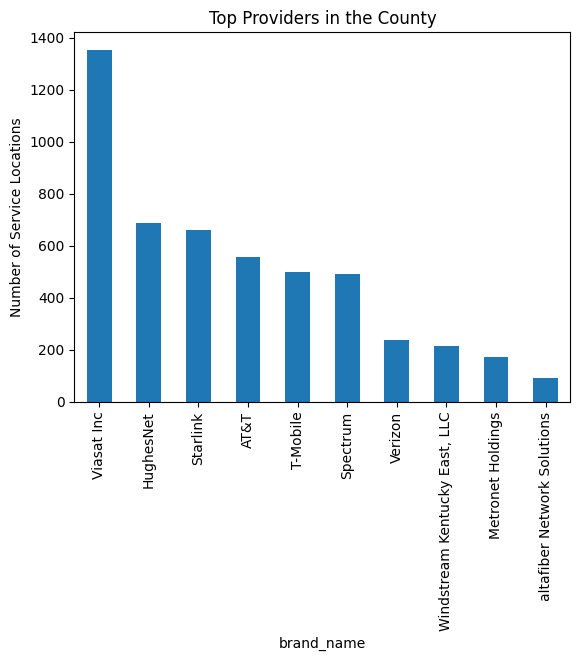

In [7]:
import matplotlib.pyplot as plt

df['brand_name'].value_counts().head(10).plot(kind='bar')
plt.title("Top Providers in the County")
plt.ylabel("Number of Service Locations")
plt.show()

B. What are the most common technologies (fixed wireless, fiber, DSL, cable)?

In [8]:
df['technology'].value_counts()

technology
60    2045
71     909
50     692
61     662
40     542
10     377
70     136
72      11
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Technology Types')

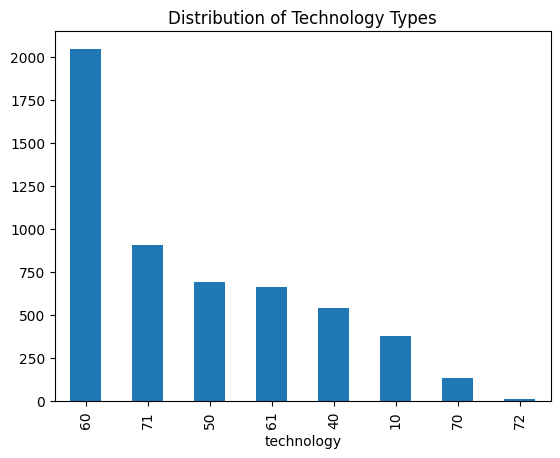

In [9]:
df['technology'].value_counts().plot(kind='bar')
plt.title("Distribution of Technology Types")

C. Distribution of advertised download/upload speeds

In [10]:
df['max_advertised_download_speed'].describe()
df['max_advertised_upload_speed'].describe()

count     5374.000000
mean       578.897469
std       1692.986122
min          0.000000
25%          3.000000
50%          5.000000
75%         30.000000
max      25000.000000
Name: max_advertised_upload_speed, dtype: float64

Text(0.5, 1.0, 'Distribution of Advertised Download Speeds')

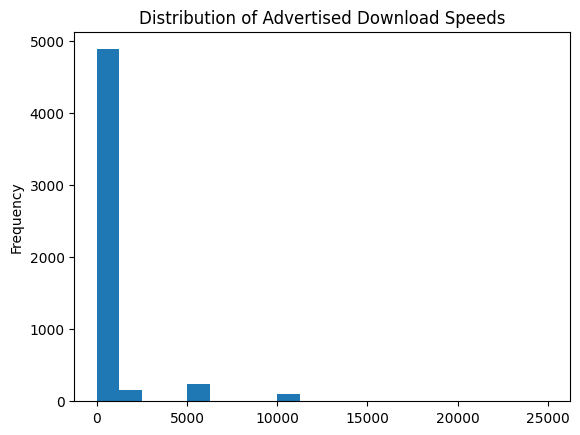

In [11]:
df['max_advertised_download_speed'].plot(kind='hist', bins=20)
plt.title("Distribution of Advertised Download Speeds")

How many blocks appear served but have low speeds (e.g., < 25 Mbps)

In [12]:
underserved = df[df['max_advertised_download_speed'] < 25]
underserved.shape

(594, 18)

In [13]:
len(underserved) / len(df) * 100

11.053219203572757

In [14]:
df[df['max_advertised_download_speed'] < 25]['block_geoid'].nunique()

41

In [15]:
pop_underserved = df[df['max_advertised_download_speed'] < 25]['total_population'].sum()
pop_total = df['total_population'].sum()
pop_underserved / pop_total * 100

np.float64(13.514358352461475)

In [16]:
df[df['max_advertised_download_speed'] < 25] \
  .groupby('block_geoid')['brand_name'] \
  .nunique() \
  .value_counts()

brand_name
2    17
3    13
1     9
4     2
Name: count, dtype: int64

 Compare population vs. service quality

In [17]:
pop_speed = df.groupby('block_geoid').agg({
    'max_advertised_download_speed':'mean',
    'total_population':'first'
}).reset_index()

Text(0.5, 1.0, 'Population vs Avg Download Speed per Block')

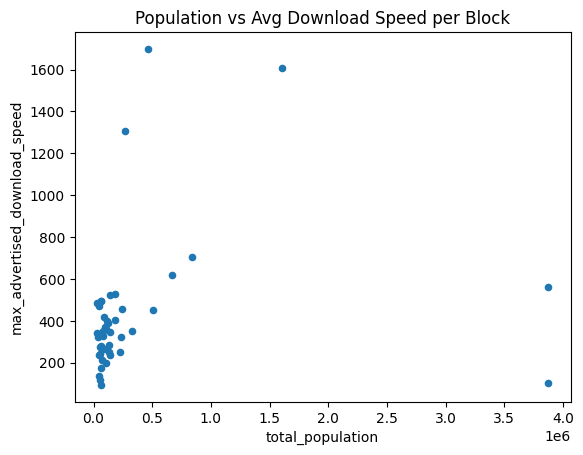

In [18]:
pop_speed.plot.scatter(
    x='total_population',
    y='max_advertised_download_speed'
)
plt.title("Population vs Avg Download Speed per Block")

Identify misclassified blocks

In [19]:
misclassified = df[
    (df['max_advertised_download_speed'] < 25) |
    (df['technology'].isin([10, 11, 50]))   # example DSL/Sat codes
]

misclassified.head()

,frn,provider_id,brand_name,location_id,technology,max_advertised_download_speed,max_advertised_upload_speed,low_latency,business_residential_code,state_usps,block_geoid,h3_res8_id,block_geoid_str,county_fips,county,total_population,total_housing_units,county_name
542,1857952,130077,AT&T,1301707750,10,25,5,1,X,KY,211110000000000,88266885bbfffff,2.111100e+14,111,111,3872911,1760573,Jefferson
543,1857952,130077,AT&T,1301728053,10,50,10,1,X,KY,211110000000000,882668b209fffff,2.111100e+14,111,111,3872911,1760573,Jefferson
544,1857952,130077,AT&T,1301804647,10,100,20,1,X,KY,211110000000000,882668869dfffff,2.111100e+14,111,111,3872911,1760573,Jefferson
545,1857952,130077,AT&T,1301703114,10,25,5,1,X,KY,211110000000000,88266d48e3fffff,2.111100e+14,111,111,3872911,1760573,Jefferson
546,1857952,130077,AT&T,1301853218,10,50,10,1,X,KY,211110000000000,88266884d9fffff,2.111100e+14,111,111,3872911,1760573,Jefferson


# Recommended Summary Tables

In [20]:
providers_per_block = df.groupby('block_geoid')['brand_name'].nunique().reset_index()
providers_per_block.columns = ['block_geoid','provider_count']

County coverage scorecard

In [21]:
coverage_summary = pd.DataFrame({
    "Total Blocks":[df['block_geoid'].nunique()],
    "Avg Download Speed":[df['max_advertised_download_speed'].mean()],
    "Avg Upload Speed":[df['max_advertised_upload_speed'].mean()],
    "Blocks Under 25 Mbps":[underserved['block_geoid'].nunique()],
})


In [22]:
coverage_summary

,Total Blocks,Avg Download Speed,Avg Upload Speed,Blocks Under 25 Mbps
0,44,689.45348,578.897469,41


In [23]:
coverage_summary.to_csv("coverage_summary.csv", index=False)
providers_per_block.to_csv("providers_per_block.csv", index=False)
underserved.to_csv("underserved_locations.csv", index=False)

In [24]:

block_summary = df.groupby('block_geoid').agg(
    avg_download=('max_advertised_download_speed','mean'),
    avg_upload=('max_advertised_upload_speed','mean'),
    provider_count=('brand_name','nunique'),
    population=('total_population','first'),
    housing_units=('total_housing_units','first')
).reset_index()

block_summary['served_flag'] = block_summary['avg_download'] >= 25

block_summary.to_csv("pb_data_block_summary.csv", index=False)

In [25]:
provider_stats = df.groupby('brand_name').agg(
    locations=('location_id','count'),
    avg_download=('max_advertised_download_speed','mean'),
    avg_upload=('max_advertised_upload_speed','mean')
).reset_index()

provider_stats.to_csv("pb_data_provider_stats.csv", index=False)


In [26]:
df.to_csv("pb_data_locations.csv", index=False)